# Quantum Mentorship Program - Task 4 The NISQ Devices

# Limits
- Resource Intensive: Simulations of quantum systems can be resource intensive, especially for large scale quantum circuits. In the first part of the exercise this was not a problem, yet in the extension of the work in the document "Extra_Number_of_qubits.ipynb" the number of qubits was increased and severe limitations on the scalability of the algorithms
 were seen. In fact it was seen that the computational time increases as a geometric series with an approximate factor of 25, making simulations over 12 qubits effectivly impossible.

# Capabilities

- Algorithm Development: The simulations with noise can give some very useful information, especially on the qualitative understanding of how noise can affect the the results of the algorithm. This can be an incredibly useful tool to evaluate algorithms before sending them to real hardware for testing. In the extension work found in the document titled "Extra_Comparison_to_NISQ.ipynb" the polarization channel is compared to the fake "real" noise of the IBM quantum device guadalupe. Despite being 2 different types of noise, it is still very useful to see the results and compare them! 

# Improvement

- Noise Models: Researchers are working on improving quantum simulators by incorporating more realistic noise models to better emulate the behavior of quantum hardware, helping to bridge the gap between simulation and real-world performance. The more accurate the noise model the easier it is to predict the outcome of an algorithm. The main limitation of using a depolarization channel is that it is a constant error. Usually there are better/worse qubits and qubit connectivity, a simple general model can capture the main qualitative behaviour but cannot give you the exact effect of the noise as from real hardware!

- Parallelization: Distributed computing and GPU acceleration can be employed to speed up simulations. Also the integration with JAX Just In Time compilation can drastically improve the computational times.

In [22]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from Task4_functions import *

# States

In [23]:
#The states to be swapped as indicated in the exercise sheet
states = []

state_1_ex1 = np.array([np.sqrt(0.3), np.sqrt(0.7)])
state_2_ex1 = np.array([np.sqrt(0.6), np.sqrt(0.4)])
states_ex1 = [state_1_ex1, state_2_ex1]
states.append(states_ex1)

state_1_ex2 = np.array([np.sqrt(0.1), np.sqrt(0.2), np.sqrt(0.6), np.sqrt(0.1)])
state_2_ex2 = np.array([np.sqrt(0), np.sqrt(0.5), np.sqrt(0.1), np.sqrt(0.4)])
states_ex2 = [state_1_ex2, state_2_ex2]
states.append(states_ex2)


state_1_ex3 = np.array([np.sqrt(0.01), np.sqrt(0.10), np.sqrt(0.12), np.sqrt(0.13), 
                    np.sqrt(0.04), np.sqrt(0), np.sqrt(0.35), np.sqrt(0.25)])

state_2_ex3 = np.array([np.sqrt(0), np.sqrt(0.20), np.sqrt(0.20), np.sqrt(0.10), 
                    np.sqrt(0.20), np.sqrt(0.05), np.sqrt(0.05), np.sqrt(0.20)])
states_ex3 = [state_1_ex3, state_2_ex3]
states.append(states_ex3)

# Circuits

In [24]:
n_qubits_list = [2,4,6]

operations_list = create_operations_list(states, n_qubits_list)
devices = create_device_list(n_qubits_list, shots = 'None')
circuits = create_circuit_list(devices, n_qubits_list)

(<Figure size 1100x300 with 1 Axes>, <Axes: >)

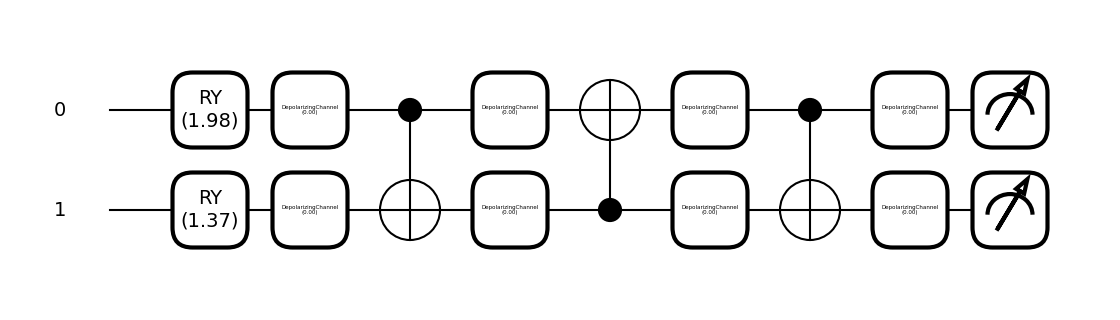

In [25]:
qml.draw_mpl(circuits[0], wire_order= range(n_qubits_list[0]), decimals=2)(0, n_qubits_list[0], operations_list[0][0], operations_list[0][1])

(<Figure size 2300x500 with 1 Axes>, <Axes: >)

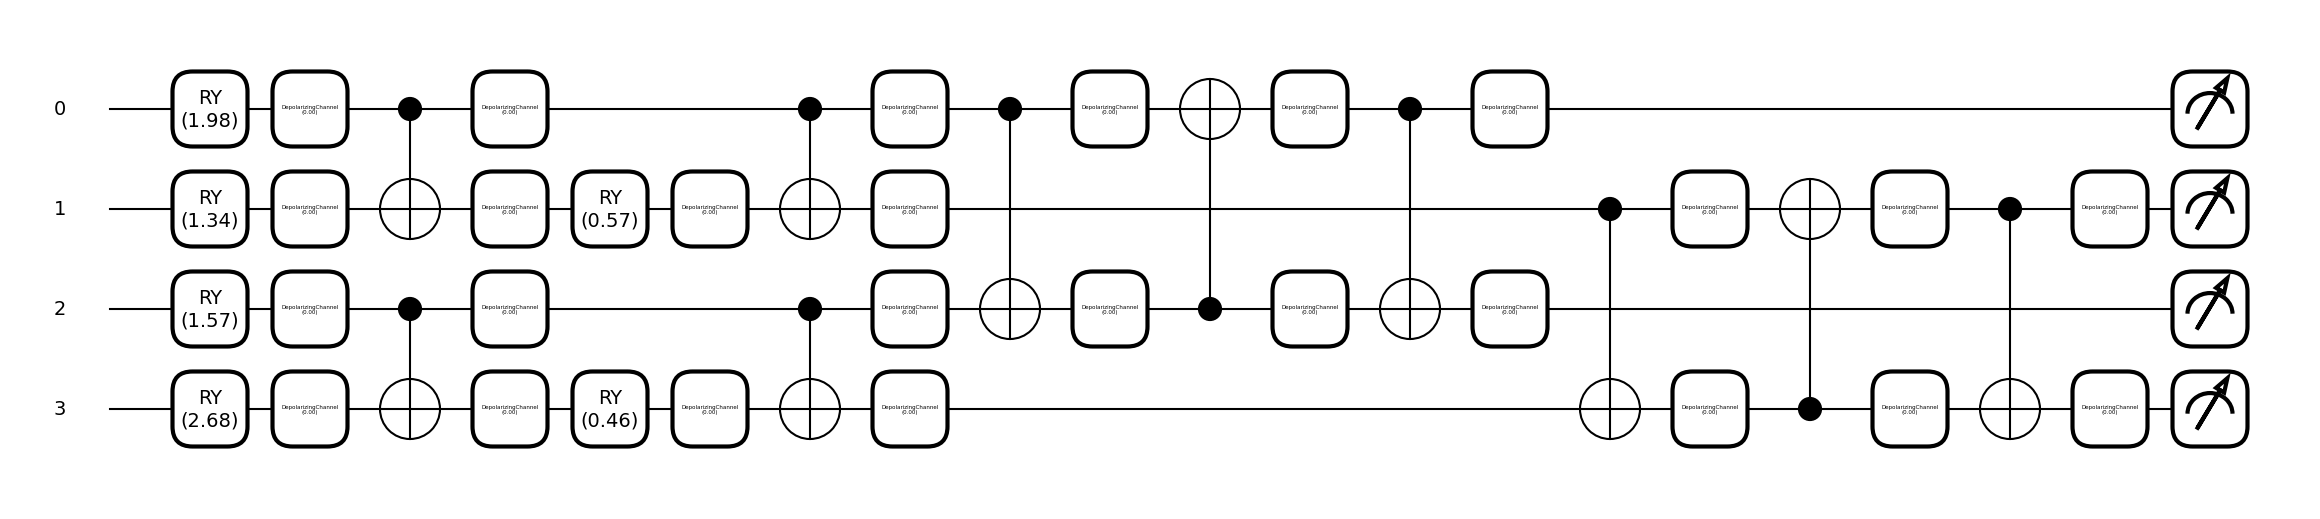

In [26]:
qml.draw_mpl(circuits[1], wire_order= range(n_qubits_list[1]), decimals=2)(0, n_qubits_list[1], operations_list[1][0], operations_list[1][1])

(<Figure size 4300x700 with 1 Axes>, <Axes: >)

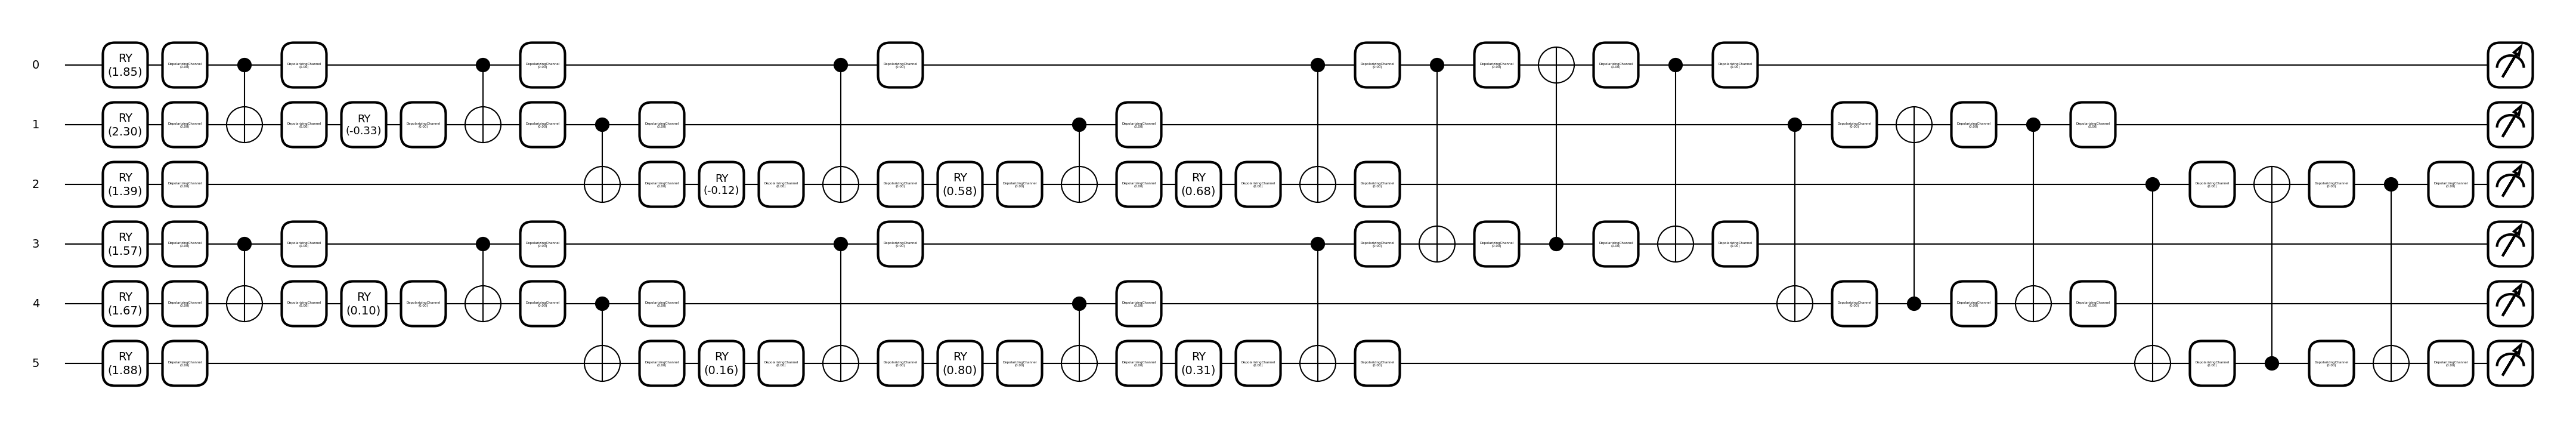

In [27]:
qml.draw_mpl(circuits[2], wire_order= range(n_qubits_list[2]), decimals=2)(0, n_qubits_list[2], operations_list[2][0], operations_list[2][1])

# Experiments

In [28]:
# Preliminary tests to show that the circuit is indeed working
res = []
for i in range(len(circuits)):
    res.append(circuits[i](
            p = 0, 
            n_qubits = n_qubits_list[i], 
            list_ops_state_1 = operations_list[i][0], 
            list_ops_state_2 = operations_list[i][1]
            ))
res_states = extract_statvector(res)


for i in range(len(n_qubits_list)):
    state_theoretical = convert_to_statevector(states[i][1], states[i][0])
    density_theoretical = np.outer(state_theoretical, state_theoretical)
    fid = fidelity(density_theoretical, res[i])
    print(f'The fidelity between the analytical results and the code for {n_qubits_list[i]} qubits is \n {fid}')

The fidelity between the analytical results and the code for 2 qubits is 
 1.000000022579709
The fidelity between the analytical results and the code for 4 qubits is 
 1.0000000483811868
The fidelity between the analytical results and the code for 6 qubits is 
 1.0000001817863386


/home/ubuntu/.local/lib/python3.10/site-packages/autograd/numpy/numpy_wrapper.py:77: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return _np.array(args, *array_args, **array_kwargs)


In [29]:
#Calculate the density matrices of the SWAP circuit without noise
p_values = np.linspace(0, 0, 1)
zeros_noise_results = density_matrix_results(circuits, n_qubits_list, operations_list, p_values)

#Calculate the density matrices of the SWAP circuit with noise
p_values = np.linspace(0, 0.5, 200)
noisy_results = density_matrix_results(circuits, n_qubits_list, operations_list, p_values)

#Calculate the fidelity between noisy and noiseless density matrices
fidelties = calc_fidelity(zeros_noise_results, noisy_results, n_qubits_list, p_values)

# Plots

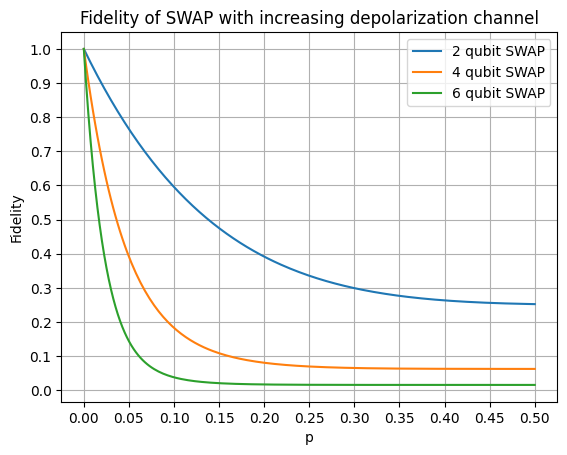

In [30]:
for i in range(len(n_qubits_list)):
    label = f'{n_qubits_list[i]} qubit SWAP'
    plt.plot(p_values, fidelties[:, i], label = label)
plt.legend()
plt.ylabel('Fidelity')
plt.xlabel('p')
plt.xticks(np.linspace(0, 0.5,11))
plt.yticks(np.linspace(0, 1, 11))
plt.title('Fidelity of SWAP with increasing depolarization channel')
plt.grid()

# Number of gates

In [31]:
specs_fun = create_specs_list(circuits, n_qubits_list, operations_list)
num_gates = create_num_gate_list(specs_fun, n_qubits_list)
num_polarization_gates = create_num_depolarization_gates_list(specs_fun, n_qubits_list)

for i in range(len(n_qubits_list)):
    print(f'The SWAP of {n_qubits_list[i]} qubits requires {num_gates[i]} gates and has {num_polarization_gates[i]} depolarization gates')

The SWAP of 2 qubits requires 5 gates and has 8 depolarization gates
The SWAP of 4 qubits requires 13 gates and has 20 depolarization gates
The SWAP of 6 qubits requires 29 gates and has 44 depolarization gates


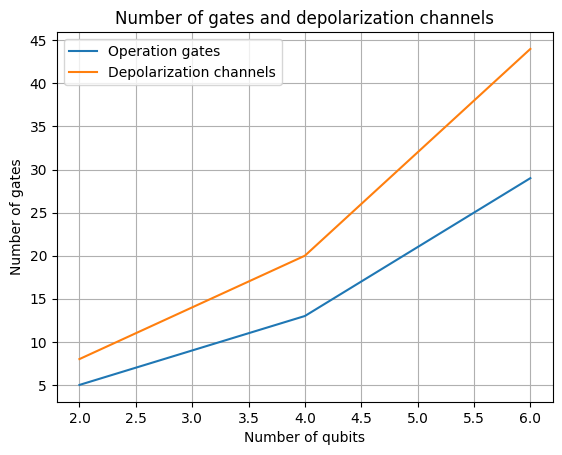

In [32]:
plt.ylabel('Number of gates')
plt.xlabel('Number of qubits')
plt.title('Number of gates and depolarization channels')
plt.grid()
plt.plot(n_qubits_list, num_gates, label='Operation gates')
plt.plot(n_qubits_list, num_polarization_gates, label='Depolarization channels')
plt.legend()

# Limiting Factor

- Noise Model: The biggest limiting factor in the simulations is the Noise Model. Despite polatization channels being a useful way to get understanding of the systms, real hardware, both photonic and other architectures, have noise models which tend to be more complex. These complex models of noise manage to effectivly capture the real behaviour of the hardware and make engineers and sceintist understand where the problem is so a solution can be found. 